# *Parte 1: Búsqueda lineal en documentos*


In [1]:
import pandas as pd

In [2]:
import os

In [3]:

# Ruta al archivo ZIP 
path = './'  
df = pd.read_csv(path + 'archive.zip', compression='zip')

# Mostrar las primeras filas del dataframe
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
def buscar(docs, query):
    
    # Crear una máscara booleana que verifica si la palabra está en cada documento
    mask = docs.str.contains(query, case=False, na=False)  # case=False para no distinguir entre mayúsculas/minúsculas
    
    # Filtrar el DataFrame usando la máscara
    result = docs[mask]
    
    return result

# Ejecutar la búsqueda
resultado = buscar(df['review'], 'little')  # Reemplaza 'wonderful' con la palabra que deseas buscar

# Mostrar los resultados
resultado

1        A wonderful little production. <br /><br />The...
3        Basically there's a family where a little boy ...
21       I had the terrible misfortune of having to vie...
25       The Karen Carpenter Story shows a little more ...
26       "The Cell" is an exotic masterpiece, a dizzyin...
                               ...                        
49949    If any movie ever made Italians look bad, this...
49959    My thoughts on the movie, 9<br /><br />It was ...
49960    John Carpenter's career is over if this sad ex...
49969    I must admit that this is one of the worst mov...
49991    Les Visiteurs, the first movie about the medie...
Name: review, Length: 9503, dtype: object

# *Parte 2: Construcción de un índice invertido*


In [6]:
from collections import defaultdict

def construir_indice_invertido(docs):
    
    indice = defaultdict(list)  # Usamos defaultdict para manejar las listas automáticamente
    
    # Recorremos todos los documentos
    for idx, doc in docs.items():
        # Limpiamos y dividimos la reseña en palabras (convertimos a minúsculas)
        palabras = doc.lower().split()
        
        # Agregamos cada palabra al índice, asociándola con el índice del documento
        for palabra in set(palabras):  # Usamos 'set' para evitar duplicados en el mismo documento
            indice[palabra].append(idx)
    
    return dict(indice)  # Convertimos el defaultdict a un diccionario regular y lo devolvemos

# Ejemplo de uso
indice_invertido = construir_indice_invertido(df['review'])


In [7]:
def buscar_en_indice(indice, palabra):
    
    # Consultamos el índice invertido
    if palabra in indice:
        return indice[palabra]
    else:
        return []  # Si la palabra no se encuentra en el índice, retornamos una lista vacía

# Ejemplo de búsqueda
resultado_busqueda = buscar_en_indice(indice_invertido, 'little')
print("Documentos que contienen 'little':", resultado_busqueda)



Documentos que contienen 'little': [1, 3, 21, 25, 26, 28, 29, 35, 36, 60, 65, 71, 73, 76, 77, 79, 83, 101, 108, 109, 121, 127, 129, 131, 132, 138, 142, 144, 145, 146, 147, 148, 150, 151, 152, 169, 170, 172, 188, 192, 196, 198, 204, 212, 216, 220, 224, 226, 227, 235, 244, 254, 263, 267, 275, 281, 288, 292, 303, 307, 310, 314, 321, 322, 325, 326, 334, 338, 339, 342, 350, 352, 353, 357, 363, 364, 369, 373, 374, 375, 378, 387, 388, 393, 403, 406, 410, 425, 426, 428, 429, 431, 432, 435, 439, 441, 450, 454, 456, 479, 481, 484, 495, 497, 499, 501, 510, 513, 516, 520, 525, 526, 539, 549, 552, 557, 566, 570, 573, 576, 577, 587, 588, 590, 591, 593, 595, 600, 601, 608, 611, 618, 622, 626, 633, 635, 639, 645, 647, 649, 652, 654, 658, 661, 678, 685, 686, 714, 715, 723, 724, 729, 735, 743, 744, 745, 746, 749, 750, 753, 759, 765, 768, 785, 787, 789, 790, 791, 798, 816, 819, 825, 845, 863, 887, 889, 901, 902, 909, 912, 918, 923, 938, 939, 957, 967, 971, 975, 984, 991, 995, 1001, 1009, 1010, 1023, 1033

# *Parte 3: Evaluación de tiempos de búsqueda*


In [8]:
# Ruta al archivo ZIP 
path = './'  
df_large = pd.read_csv(path + 'archivelarge.zip', compression='zip')

# Mostrar las primeras filas del dataframe
df_large.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [35]:
# Palabras a buscar
palabras_a_buscar = ['wonderful', 'amazing', 'great', 'bad', 'horrible']

In [36]:
def buscar_lineal(docs, query):
    resultado = []
    for idx, doc in docs.items():
        # Verificamos si el valor es una cadena de texto antes de aplicar .lower()
        if isinstance(doc, str) and query.lower() in doc.lower():  # Verificamos si doc es una cadena de texto
            resultado.append(idx)
    return resultado

In [37]:
from collections import defaultdict

def construir_indice_invertido(docs):
    indice = defaultdict(list)  # Usamos defaultdict para manejar las listas automáticamente
    
    # Recorremos todos los documentos
    for idx, doc in docs.items():
        palabras = doc.split()  # Convertimos a minúsculas y dividimos en palabras
        for palabra in set(palabras):  # Usamos set para evitar duplicados en el mismo documento
            indice[palabra].append(idx)
    
    return dict(indice)

# Construir el índice invertido para el corpus pequeño
indice_invertido_small = construir_indice_invertido(df['review'])

In [38]:
# Construir el índice invertido para el corpus grande
def construir_indice_invertido_large(docs):
   
    indice = defaultdict(list)
    
    for idx, doc in docs.items():
        # Filtramos y aseguramos que solo procesemos cadenas de texto válidas
        if isinstance(doc, str):  # Solo procesamos cadenas de texto
            palabras = doc.split()  # Convertimos a minúsculas y dividimos en palabras
            for palabra in set(palabras):  # Usamos set para evitar duplicados en el mismo documento
                indice[palabra].append(idx)
    
    return dict(indice)  # Convertimos el defaultdict a un diccionario regular y lo devolvemos

# Construir el índice invertido para el corpus grande
indice_invertido_large = construir_indice_invertido_large(df_large['reviewText'])

In [39]:
def buscar_en_indice(indice, palabra):
  # Convertimos la palabra a minúsculas
    return indice.get(palabra, [])  # Retorna la lista de documentos, o una lista vacía si no se encuentra

In [40]:
import time

# Medir el tiempo de búsqueda lineal en el corpus pequeño
start_time = time.time()
resultados_lineales_small = [buscar_lineal(df['review'], palabra) for palabra in palabras_a_buscar]
end_time = time.time()
lineal_small_corpus_time = end_time - start_time

# Medir el tiempo de búsqueda lineal en el corpus grande
start_time = time.time()
resultados_lineales_large = [buscar_lineal(df_large['reviewText'], palabra) for palabra in palabras_a_buscar]
end_time = time.time()
lineal_large_corpus_time = end_time - start_time

# Mostrar los tiempos de ejecución
print(f"Tiempo de búsqueda lineal en el corpus pequeño: {lineal_small_corpus_time} segundos")
print(f"Tiempo de búsqueda lineal en el corpus grande: {lineal_large_corpus_time} segundos")

Tiempo de búsqueda lineal en el corpus pequeño: 0.9739999771118164 segundos
Tiempo de búsqueda lineal en el corpus grande: 5.019999980926514 segundos


In [41]:
import time

# Medir el tiempo de búsqueda usando el índice invertido en el corpus pequeño
start_time = time.time()
resultados_indice_small = {palabra: buscar_en_indice(indice_invertido_small, palabra) for palabra in palabras_a_buscar}
end_time = time.time()
indice_small_corpus_time = end_time - start_time

# Medir el tiempo de búsqueda usando el índice invertido en el corpus grande
start_time = time.time()
resultados_indice_large = {palabra: buscar_en_indice(indice_invertido_large, palabra) for palabra in palabras_a_buscar}
end_time = time.time()
indice_large_corpus_time = end_time - start_time

# Mostrar los tiempos de ejecución
print(f"Tiempo de búsqueda con índice invertido en el corpus pequeño: {indice_small_corpus_time} segundos")
print(f"Tiempo de búsqueda con índice invertido en el corpus grande: {indice_large_corpus_time} segundos")

Tiempo de búsqueda con índice invertido en el corpus pequeño: 0.0029997825622558594 segundos
Tiempo de búsqueda con índice invertido en el corpus grande: 0.010000228881835938 segundos


In [42]:
import pandas as pd

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Método de Búsqueda': ['Búsqueda Lineal (Pequeño)', 'Búsqueda Lineal (Grande)', 'Índice Invertido (Pequeño)', 'Índice Invertido (Grande)'],
    'Tiempo de Ejecución (segundos)': [lineal_small_corpus_time, lineal_large_corpus_time, indice_small_corpus_time, indice_large_corpus_time]
})

# Mostrar la tabla comparativa
print(resultados)

           Método de Búsqueda  Tiempo de Ejecución (segundos)
0   Búsqueda Lineal (Pequeño)                           0.974
1    Búsqueda Lineal (Grande)                           5.020
2  Índice Invertido (Pequeño)                           0.003
3   Índice Invertido (Grande)                           0.010


Matplotlib is building the font cache; this may take a moment.


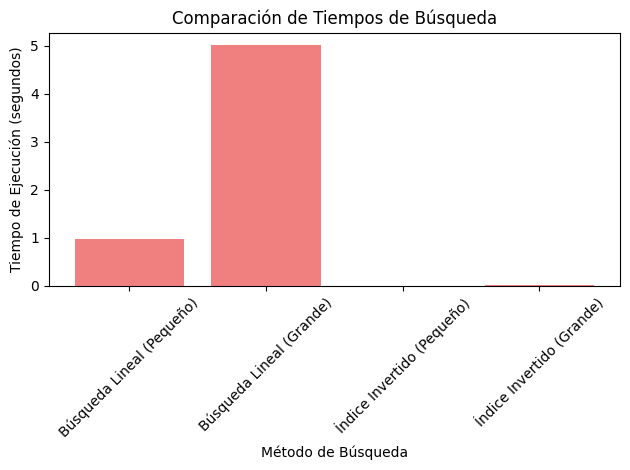

In [43]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para comparar los tiempos
plt.bar(resultados['Método de Búsqueda'], resultados['Tiempo de Ejecución (segundos)'], color='lightcoral')
plt.xlabel('Método de Búsqueda')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos de Búsqueda')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()